#**Medical Insurance Cost**

##Problem Statement:-

*   Predict healthcare costs for patients based on demographic, lifestyle, health status, insurance, family history, proximity to healthcare facilities, and primary care utilization.

##Expected Outcome:-

*   Predictive model for estimating medical costs and actionable insights to optimize resource allocation and enhance healthcare services at Hospital ABC.



#Step 1:- Data Preprocessing




In [512]:
# Import Basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from tabulate import tabulate
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [513]:
# Import the data

d=pd.read_csv("/content/medical_data.csv")
d

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,56.0,Male,26.78763,0.0,No,East,White Collar,Daily,2.0,Gold,...,Difficult,Weak,Good,Present,High,Yes,Unavailable,4.0,975.5380,84.78763
1,69.0,Male,22.06365,4.0,Yes,West,White Collar,Monthly,2.0,Bronze,...,Difficult,Weak,Good,Absent,High,Yes,Available,2.0,1047.9770,92.06365
2,46.0,Female,24.03610,2.0,Yes,East,White Collar,Rarely,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,No,Unavailable,2.0,836.3854,71.03610
3,32.0,Male,24.22982,2.0,No,North,Blue Collar,Rarely,2.0,Gold,...,NaN,Strong,Good,NaN,Low,No,Available,0.0,927.0653,58.22982
4,60.0,Male,31.78428,0.0,NaN,East,Blue Collar,Weekly,0.0,Silver,...,Easy,Weak,Poor,Present,Low,Yes,Available,2.0,1260.7970,91.78428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.0,Male,17.79434,0.0,Yes,West,Other,Monthly,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,Yes,Unavailable,2.0,932.2167,36.79434
996,35.0,Female,22.53824,1.0,Yes,NaN,Other,Monthly,1.0,NaN,...,Easy,Weak,Good,Absent,Low,Yes,Unavailable,4.0,1280.2350,58.53824
997,49.0,NaN,18.28548,4.0,No,South,Other,Monthly,2.0,Bronze,...,Easy,NaN,Poor,NaN,High,No,Unavailable,1.0,1336.6650,69.28548
998,64.0,Male,22.09611,2.0,No,West,White Collar,Rarely,0.0,Gold,...,Difficult,Strong,Good,Present,High,Yes,Unavailable,0.0,779.2834,88.09611


*Insights*

*   The Dataset contains 1000 rows and 35 columns.
*   The dataset includes individuals with varying ages, sexes, BMI values, number of children, and smoking habits. It seems to represent a diverse population.
* There are regions mentioned such as East, West, North, and South, indicating the dataset might cover a broad geographic area.  
* The dataset categorizes individuals by occupation (White Collar, Blue Collar, Other) and their exercise frequency (Daily, Monthly, Weekly, Rarely), providing insights into lifestyle factors.  
*   Insurance plan types vary from Gold, Bronze, to Silver, suggesting differences in coverage and possibly socioeconomic status.
*  Information regarding access to healthcare (Easy, Difficult), availability of telemedicine, emergency room visits, and healthcare charges provides insights into healthcare utilization patterns and potential barriers to access.
*  The presence of chronic conditions, comorbidities, and genetic predispositions indicates the health status and potential risk factors within the population.
*  Variables like social support, environmental factors, and health literacy levels shed light on the broader social determinants of health influencing individuals' well-being.
*  There are missing values in some columns (e.g., Sex, BMI), which might require data cleaning or imputation techniques to handle.  
*  Assessing the completeness and consistency of data across all columns is essential to ensure the reliability of analysis and insights derived from the dataset.

In [514]:
d.shape

(1000, 35)

*Insights*

*   The shape of the dataset is (1000,35)



In [515]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            950 non-null    float64
 1   Sex                            950 non-null    object 
 2   BMI                            951 non-null    float64
 3   Children                       951 non-null    float64
 4   Smoker                         952 non-null    object 
 5   Region                         952 non-null    object 
 6   Occupation                     951 non-null    object 
 7   Exercise_Frequency             951 non-null    object 
 8   Chronic_Conditions             950 non-null    float64
 9   Insurance_Plan_Type            951 non-null    object 
 10  Marital_Status                 953 non-null    object 
 11  Distance_to_Nearest_Hospital   952 non-null    float64
 12  Income_Level                   950 non-null    ob

*Insights*

*   The dataset contains both numerical (integer and float) and categorical (object) data types.
*   Some of the attributes have missing values.



In [516]:
d.duplicated().sum()

0


*   There is no duplcate values



In [517]:
d.head()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,56.0,Male,26.78763,0.0,No,East,White Collar,Daily,2.0,Gold,...,Difficult,Weak,Good,Present,High,Yes,Unavailable,4.0,975.5380,84.78763
1,69.0,Male,22.06365,4.0,Yes,West,White Collar,Monthly,2.0,Bronze,...,Difficult,Weak,Good,Absent,High,Yes,Available,2.0,1047.9770,92.06365
2,46.0,Female,24.03610,2.0,Yes,East,White Collar,Rarely,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,No,Unavailable,2.0,836.3854,71.03610
3,32.0,Male,24.22982,2.0,No,North,Blue Collar,Rarely,2.0,Gold,...,NaN,Strong,Good,NaN,Low,No,Available,0.0,927.0653,58.22982
4,60.0,Male,31.78428,0.0,NaN,East,Blue Collar,Weekly,0.0,Silver,...,Easy,Weak,Poor,Present,Low,Yes,Available,2.0,1260.7970,91.78428



*   This command is typically used to display the first few rows of a DataFrame named d.



In [518]:
d.tail()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
995,18.0,Male,17.79434,0.0,Yes,West,Other,Monthly,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,Yes,Unavailable,2.0,932.2167,36.79434
996,35.0,Female,22.53824,1.0,Yes,NaN,Other,Monthly,1.0,NaN,...,Easy,Weak,Good,Absent,Low,Yes,Unavailable,4.0,1280.2350,58.53824
997,49.0,NaN,18.28548,4.0,No,South,Other,Monthly,2.0,Bronze,...,Easy,NaN,Poor,NaN,High,No,Unavailable,1.0,1336.6650,69.28548
998,64.0,Male,22.09611,2.0,No,West,White Collar,Rarely,0.0,Gold,...,Difficult,Strong,Good,Present,High,Yes,Unavailable,0.0,779.2834,88.09611
999,66.0,Female,NaN,2.0,No,South,Blue Collar,Rarely,1.0,Bronze,...,Easy,Weak,Good,Absent,High,No,NaN,2.0,467.0529,NaN



*   The command d.tail() is used to display the last few rows of a DataFrame named d.




In [519]:
d.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Occupation',
       'Exercise_Frequency', 'Chronic_Conditions', 'Insurance_Plan_Type',
       'Marital_Status', 'Distance_to_Nearest_Hospital', 'Income_Level',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine',
       'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges'],
      dtype='object')


*  The command 'd.columns' is used to retrieve the column labels of a DataFrame d.




In [520]:
d.describe()

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
count,950.000000,951.000000,951.000000,950.000000,952.000000,950.000000,950.000000,951.000000,952.000000,902.000000
mean,49.824211,24.951876,2.022082,0.987368,9.548402,0.510526,4.482105,2.080967,993.174177,76.292654
std,18.090384,5.153607,1.421836,0.810786,5.683926,0.500152,2.866028,1.387450,191.866884,18.969338
min,18.000000,8.057860,0.000000,0.000000,0.004859,0.000000,0.000000,0.000000,302.044000,32.640570
25%,35.000000,21.667005,1.000000,0.000000,4.678912,0.000000,2.000000,1.000000,860.441375,60.710098
50%,50.000000,24.795710,2.000000,1.000000,9.295443,1.000000,5.000000,2.000000,997.597050,76.404575
75%,66.000000,28.548710,3.000000,2.000000,14.103435,1.000000,7.000000,3.000000,1124.350500,91.895003
max,79.000000,40.709830,4.000000,2.000000,19.978090,1.000000,9.000000,4.000000,1545.466000,120.709800


*Insights*

*  The d.describe() function provides descriptive statistics of the DataFrame d.
*  The average age of patients is approximately 49 years, with a range from 18 to 79 years.
*  The average BMI (Body Mass Index) is around 24, indicating that the patient population, on average, falls within the "normal weight" range.
*  The average healthcare charges incurred by patients is approximately $76,  with a range from  $32 to $120.
*  The average distance to the nearest hospital is approximately 9 units, with a range from 5 to 19 units.


In [521]:
d.describe(include = 'object').transpose()

,count,unique,top,freq
Sex,950,2,Male,496
Smoker,952,2,No,476
Region,952,4,East,248
Occupation,951,3,Other,328
Exercise_Frequency,951,4,Weekly,271
Insurance_Plan_Type,951,3,Bronze,328
Marital_Status,953,3,Married,332
Income_Level,950,3,Low,329
Mental_Health_Status,952,3,Fair,332
Prescription_Medication_Usage,951,2,No,482



*   This table provides information about the count of non-null entries, the number of unique categories, the most frequent category (top), and its frequency (freq) for each categorical variable in the dataset.



##**Numerical Columns**

In [522]:
numerical = d.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical)

Numerical columns: Index(['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges'],
      dtype='object')



*   The code you've provided selects numerical columns from the dataset and prints them.



##Filling  Missing values:-

In [523]:
n=d[numerical]
n.isnull().sum()
columns_to_fill = ["BMI", "Distance_to_Nearest_Hospital", "Emergency_Room_Visits", "Healthcare_Utilization"]
for column in columns_to_fill:
    n[column] = n[column].fillna(n[column].mean())

print(n)

      Age        BMI  Children  Chronic_Conditions  \
0    56.0  26.787630       0.0                 2.0   
1    69.0  22.063650       4.0                 2.0   
2    46.0  24.036100       2.0                 1.0   
3    32.0  24.229820       2.0                 2.0   
4    60.0  31.784280       0.0                 0.0   
..    ...        ...       ...                 ...   
995  18.0  17.794340       0.0                 1.0   
996  35.0  22.538240       1.0                 1.0   
997  49.0  18.285480       4.0                 2.0   
998  64.0  22.096110       2.0                 0.0   
999  66.0  24.951876       2.0                 1.0   

     Distance_to_Nearest_Hospital  Family_Medical_History  \
0                       12.233110                     0.0   
1                       11.314950                     0.0   
2                       14.294050                     1.0   
3                       18.754090                     0.0   
4                       18.245090             


*  The code first selects numerical columns from the dataset and checks for missing values in each column using the .isnull().sum() method.
*   It then identifies a list of specific columns that have missing values and fills those missing values with the mean of each respective column using the .fillna() method.
* For the selected columns with missing values, the code iterates through each column in the list columns_to_fill. For each column, it calculates the mean value using .mean() and fills the missing values in that column with the calculated mean using .fillna()





In [524]:
n.isna().sum()

Age                              50
BMI                               0
Children                         49
Chronic_Conditions               50
Distance_to_Nearest_Hospital      0
Family_Medical_History           50
Primary_Care_Physician_Visits    50
Emergency_Room_Visits             0
Healthcare_Utilization            0
Charges                          98
dtype: int64

In [525]:
columns_to_check = ['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges']
imputer = SimpleImputer(strategy='mean')
n[columns_to_check] = imputer.fit_transform(n[columns_to_check])



*  This code snippet checks for missing values (NaN) in the DataFrame n after imputation



In [526]:
n.isnull().sum()

Age                              0
BMI                              0
Children                         0
Chronic_Conditions               0
Distance_to_Nearest_Hospital     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Emergency_Room_Visits            0
Healthcare_Utilization           0
Charges                          0
dtype: int64



*  The provided code snippet, n.isnull().sum(), checks for missing values (NaN) in the DataFrame n and calculates the sum of missing values for each column.



##Calculation Of Skewness:-

In [527]:
skewness_data = []
for column in n.columns:
    skewness = skew(n[column])
    if skewness > 0.5:
        sktype = "positively skewed"
    elif skewness < -0.5:
        sktype = "negatively skewed"
    else:
        sktype = "approximately symmetric"
    skewness_data.append([column, skewness, sktype])

print("Skewness of each column:\n")
print(tabulate(skewness_data, headers=["Column", "Skewness", "Skewness Type"]))

Skewness of each column:

Column                            Skewness  Skewness Type
-----------------------------  -----------  -----------------------
Age                            -0.0673922   approximately symmetric
BMI                             0.0221644   approximately symmetric
Children                       -0.0308987   approximately symmetric
Chronic_Conditions              0.023628    approximately symmetric
Distance_to_Nearest_Hospital    0.100132    approximately symmetric
Family_Medical_History         -0.0432087   approximately symmetric
Primary_Care_Physician_Visits  -0.00508938  approximately symmetric
Emergency_Room_Visits          -0.0564949   approximately symmetric
Healthcare_Utilization         -0.0805718   approximately symmetric
Charges                        -0.0449791   approximately symmetric




*  This code computes the skewness of each numerical column in the DataFrame n and categorizes the skewness type.
*   This code provides insights into the distributional characteristics of the numerical data, helping to identify whether the data is skewed and in which direction.



##Detection Of Outliers :-

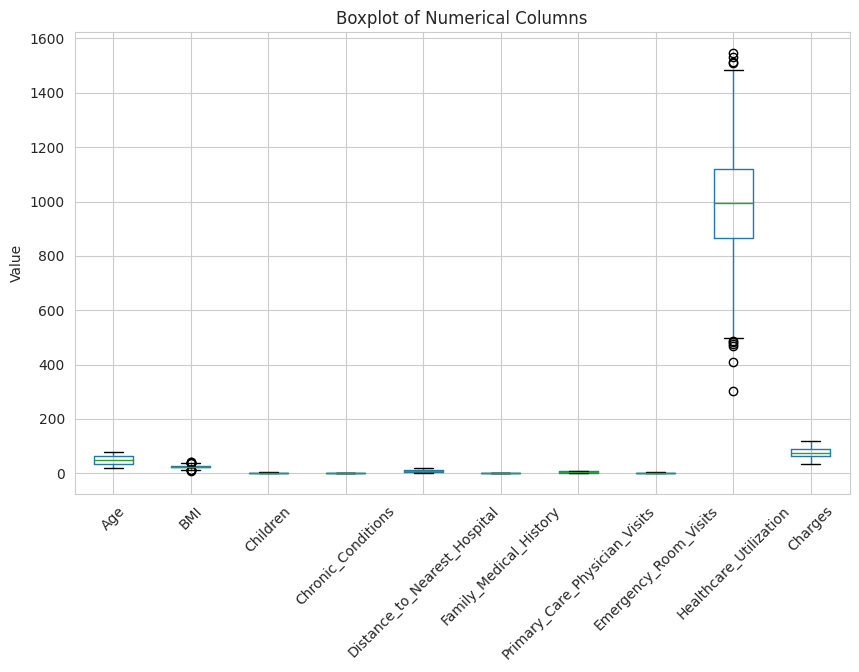

In [528]:
plt.figure(figsize=(10, 6))
n.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()



*   This code generates a boxplot for each numerical column in the DataFrame n



##Handling Outliers Of BMI And Charges:-

In [529]:
outlier_columns = ['BMI', 'Healthcare_Utilization']
for column in outlier_columns:
    Q1 = n[column].quantile(0.25)
    Q3 = n[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap outliers
    n[column] = np.where(n[column] > upper_limit, upper_limit,
                         np.where(n[column] < lower_limit, lower_limit, n[column]))



*   This code snippet identifies and caps outliers in the specified columns ('BMI' and 'Healthcare_Utilization') of the DataFrame n
* It iterates through each column specified in the list outlier_columns.
* For each column, it calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) using the quantile() method.  
* It computes the lower and upper limits for identifying outliers using the
formula:
Lower Limit = Q1 - 1.5 * IQR
Upper Limit = Q3 + 1.5 * IQR  
*  It then replaces values in the column that fall below the lower limit with the lower limit value and values that exceed the upper limit with the upper limit value using np.where().
*   This process effectively caps outliers, ensuring that extreme values beyond a certain threshold are adjusted to mitigate their impact on subsequent analyses or models.

##After Handling Outliers:-

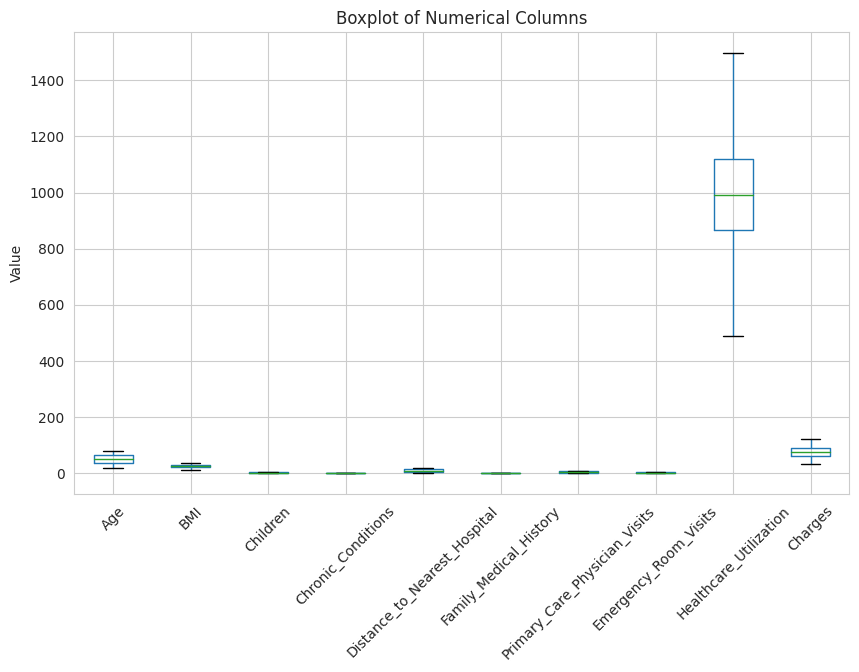

In [530]:
plt.figure(figsize=(10, 6))
n.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()



*  After handling the ouliers present in the dataset, the boxplot shows that there is no more outliers present.



##**Categorical Columns**

In [531]:
cat = d.select_dtypes(include=['object']).columns
print("Categorical columns:", cat)

Categorical columns: Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine'],
      dtype='object')




*   The provided code snippet selects categorical columns from the DataFrame d and prints them.



In [532]:
cat=d[cat]
missing_values = cat.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Sex                               50
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Insurance_Plan_Type               49
Marital_Status                    47
Income_Level                      50
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
Environmental_Factors             49
Genetic_Predisposition            47
Health_Literacy_Level             50
Comorbidities                     48
Access_to_Telemedicine            50
dtype: int64




*   This code snippet calculates and prints the number of missing values in each categorical column of the DataFrame d.



##Filling Missing Values:-

In [533]:
cat.replace('nan', pd.NA, inplace=True)
for column in cat.columns:
    mode_value = cat[column].mode()[0]
    cat[column].fillna(mode_value, inplace=True)

cat = cat.fillna(method='ffill')
for column in cat.columns:
    cat[column] = cat[column].replace('None', method='ffill')



*   This code ensures that missing values in categorical columns are appropriately handled, either by replacing them with the mode value, propagating non-null values forward, or replacing specific string values ('None') with preceding non-null values.



In [534]:
cat.isnull().sum()

Sex                              0
Smoker                           0
Region                           0
Occupation                       0
Exercise_Frequency               0
Insurance_Plan_Type              0
Marital_Status                   0
Income_Level                     0
Mental_Health_Status             0
Prescription_Medication_Usage    0
Employment_Status                0
Education_Level                  0
Dietary_Habits                   0
Alcohol_Consumption              0
Sleep_Quality                    0
Stress_Level                     0
Medication_Adherence             0
Physical_Activity                0
Access_to_Healthcare             0
Social_Support                   0
Environmental_Factors            0
Genetic_Predisposition           0
Health_Literacy_Level            0
Comorbidities                    0
Access_to_Telemedicine           0
dtype: int64



*   This code checks for missing values in the DataFrame cat after handling missing values



In [535]:
df = pd.concat([n, cat], axis=1)
df

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges,...,Stress_Level,Medication_Adherence,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine
0,56.0,26.787630,0.0,2.0,12.233110,0.0,6.000000,4.0,975.538000,84.787630,...,High,No,Active,Difficult,Weak,Good,Present,High,Yes,Unavailable
1,69.0,22.063650,4.0,2.0,11.314950,0.0,2.000000,2.0,1047.977000,92.063650,...,Medium,No,Inactive,Difficult,Weak,Good,Absent,High,Yes,Available
2,46.0,24.036100,2.0,1.0,14.294050,1.0,9.000000,2.0,836.385400,71.036100,...,High,Yes,Inactive,Difficult,Strong,Good,Absent,Low,No,Unavailable
3,32.0,24.229820,2.0,2.0,18.754090,0.0,2.000000,0.0,927.065300,58.229820,...,High,Yes,Inactive,Difficult,Strong,Good,Present,Low,No,Available
4,60.0,31.784280,0.0,0.0,18.245090,1.0,2.000000,2.0,1260.797000,91.784280,...,Medium,Yes,Inactive,Easy,Weak,Poor,Present,Low,Yes,Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.0,17.794340,0.0,1.0,3.480209,0.0,2.000000,2.0,932.216700,36.794340,...,Low,Yes,Inactive,Difficult,Strong,Good,Absent,Low,Yes,Unavailable
996,35.0,22.538240,1.0,1.0,15.215190,1.0,2.000000,4.0,1280.235000,58.538240,...,Low,No,Active,Easy,Weak,Good,Absent,Low,Yes,Unavailable
997,49.0,18.285480,4.0,2.0,0.316761,0.0,3.000000,1.0,1336.665000,69.285480,...,High,No,Inactive,Easy,Weak,Poor,Present,High,No,Unavailable
998,64.0,22.096110,2.0,0.0,11.156200,1.0,8.000000,0.0,779.283400,88.096110,...,High,Yes,Active,Difficult,Strong,Good,Present,High,Yes,Unavailable




*   This code concatenates the processed numerical DataFrame n and categorical DataFrame cat along the columns (axis=1) to create a new DataFrame df



In [536]:
df.isna().sum()

Age                              0
BMI                              0
Children                         0
Chronic_Conditions               0
Distance_to_Nearest_Hospital     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Emergency_Room_Visits            0
Healthcare_Utilization           0
Charges                          0
Sex                              0
Smoker                           0
Region                           0
Occupation                       0
Exercise_Frequency               0
Insurance_Plan_Type              0
Marital_Status                   0
Income_Level                     0
Mental_Health_Status             0
Prescription_Medication_Usage    0
Employment_Status                0
Education_Level                  0
Dietary_Habits                   0
Alcohol_Consumption              0
Sleep_Quality                    0
Stress_Level                     0
Medication_Adherence             0
Physical_Activity                0
Access_to_Healthcare

##**Our dataset will be fine-tuned and cleansed during data preprocessing.**

#Step 2 :- Exploratory Data Analysis (EDA)

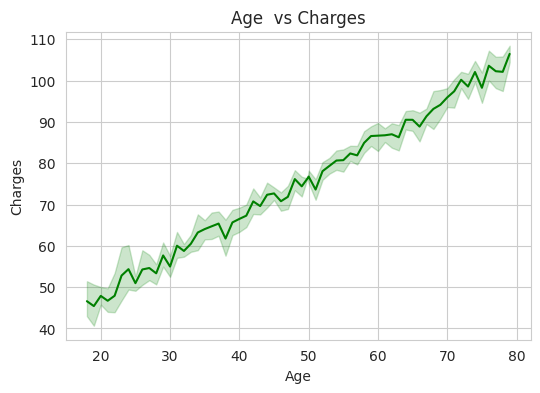

In [537]:
plt.figure(figsize = (6, 4))
sns.lineplot(x = 'Age', y = 'Charges', data = df,color='green')
plt.title('Age  vs Charges')
plt.show()

*Insights*

*   The graph shows a trend where the average charges decrease as the age group increases.
*   The highest average charges are associated with the age group 70-79, and the lowest are with the age group 18-29.

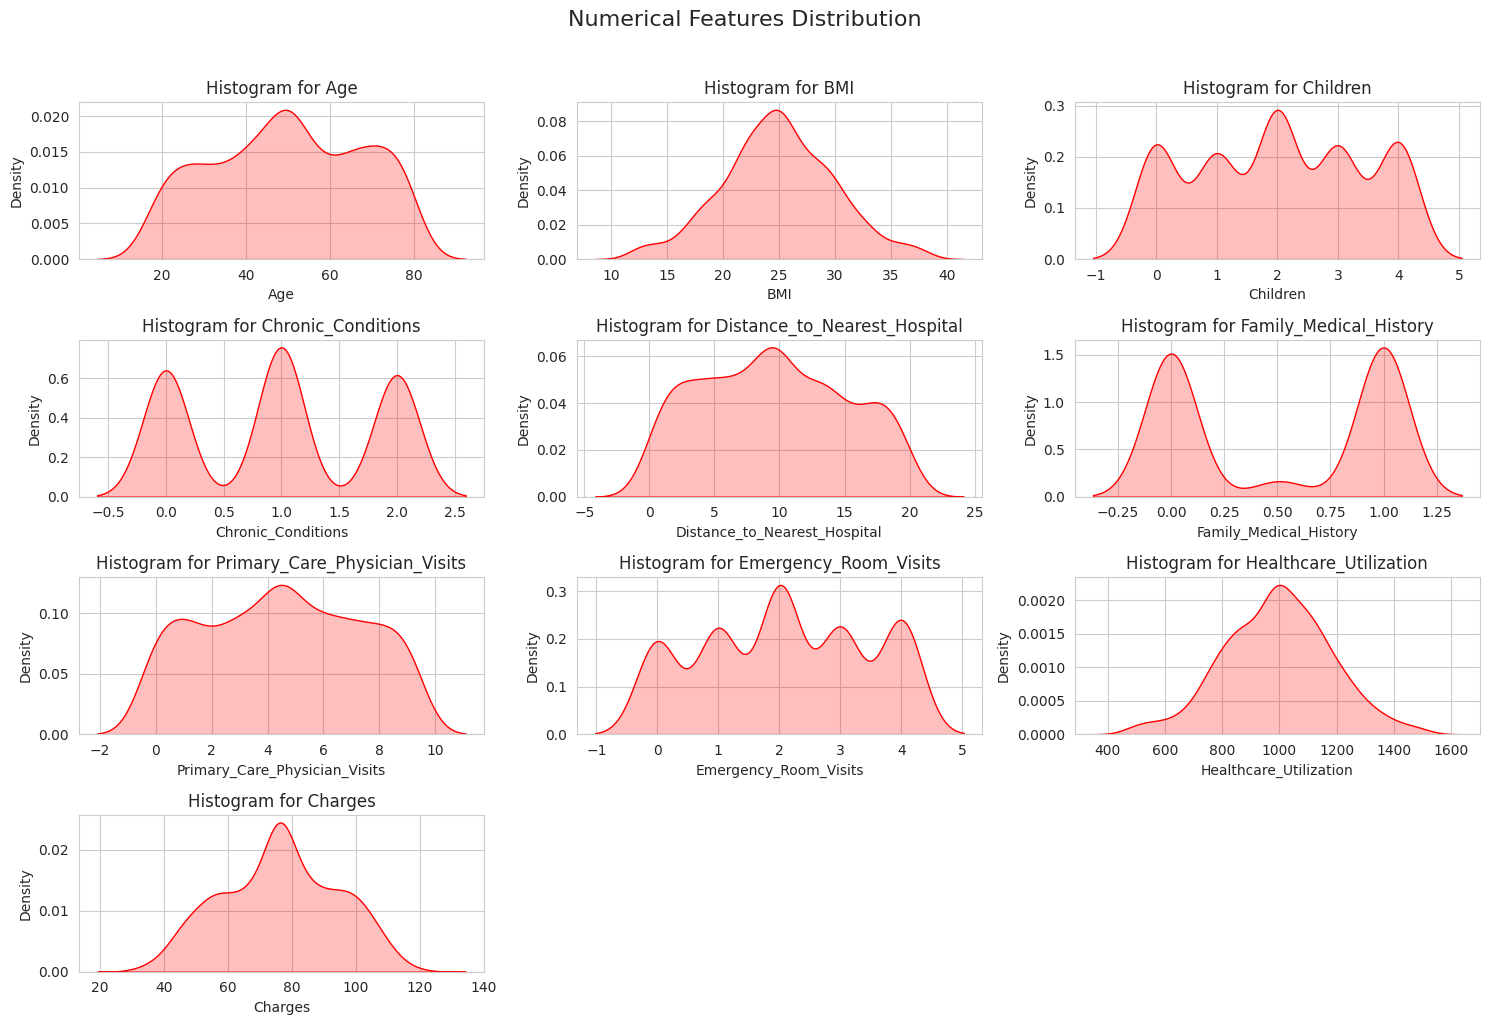

In [538]:
plt.figure(figsize = (15, 10))
plt.suptitle('Numerical Features Distribution', y = 1.02, fontsize=16)
columns_to_plot = ['Age', 'BMI', 'Children', 'Chronic_Conditions', 'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges']
for i, column in enumerate(columns_to_plot, 1):
  plt.subplot(4, 3, i)
  sns.kdeplot(data=df, x=column, fill=True,color='red')
  plt.title(f'Histogram for {column}')
plt.tight_layout()



*   BMI, Charges and Healthcare Utilization has normal distribution. Other columns shows uniform distribution.



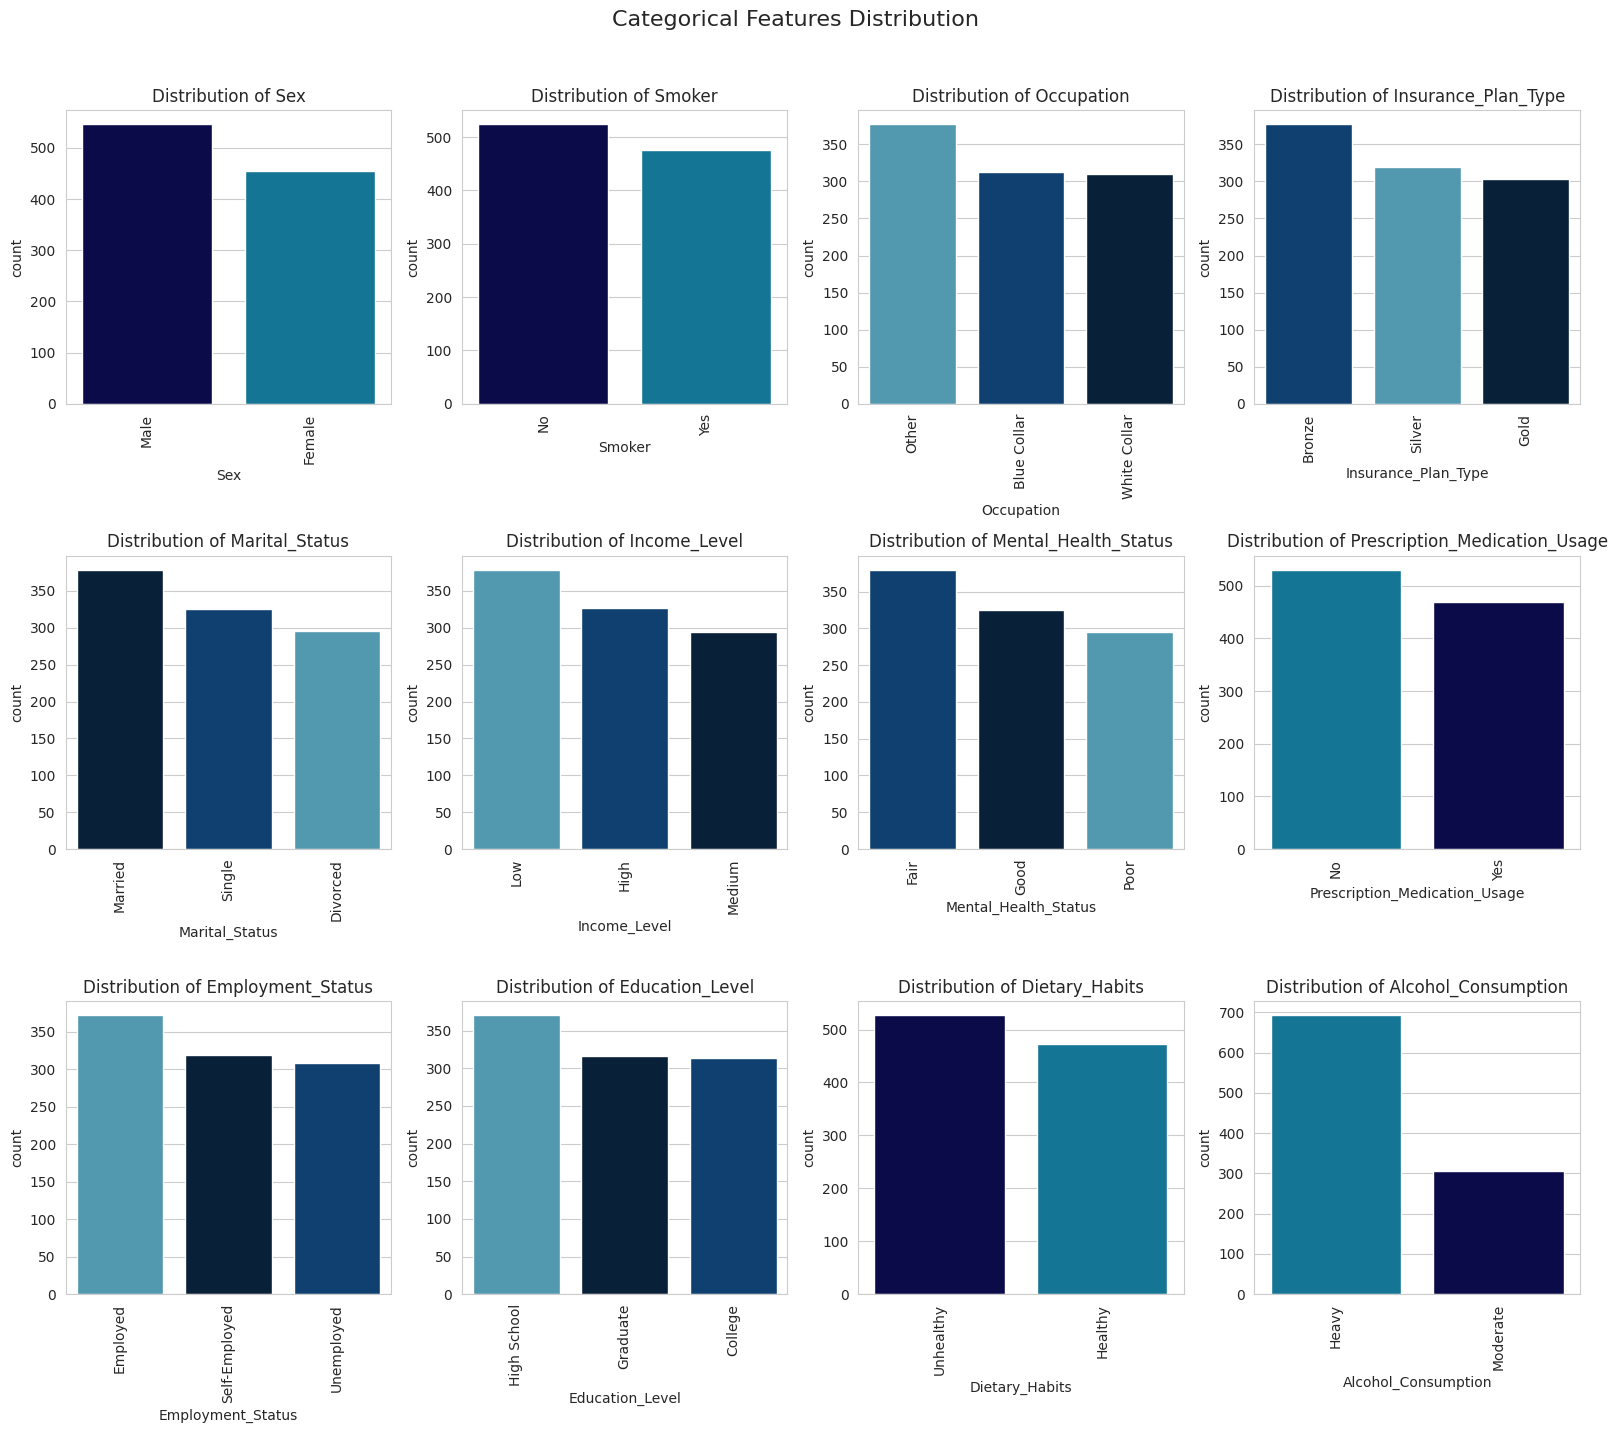

In [539]:
plt.figure(figsize = (16, 14))
columns_to_plot1 = ['Sex', 'Smoker', 'Occupation', 'Insurance_Plan_Type', 'Marital_Status', 'Income_Level', 'Mental_Health_Status',
                    'Prescription_Medication_Usage', 'Employment_Status', 'Education_Level', 'Dietary_Habits', 'Alcohol_Consumption']
plt.suptitle('Categorical Features Distribution', y = 1.02, fontsize=16)
for index,column in enumerate(columns_to_plot1, 1):
  plt.subplot(3, 4, index)
  sns.countplot(x = df[column], order=df[column].value_counts().index, palette = 'ocean', hue = df[column])
  plt.title(f'Distribution of {column}')
  plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


*Insights*

* The graph illustrates a predominant frequency of males within the dataset's "sex" column.
* The majority of patients are non-smokers.
*  The distribution of white collar and blue collar job is nearly identical with the majority doing other jobs.
* Most of the insurance plans held by patients fall under the Bronze category.  
* Majority of the patients are married.  
*  The income level tends to be low for the majority of patients.
* Mental health status is generally rated as fair for the majority of individuals.  
* 'No' has higher frequency in prescription medication usage indicating majority don't use prescription medication.  
* A significant majority of patients are employed, only few are unemployed.  
*   Majority of patients have high school education while only minority have completed college education.
* Unhealthy dietary habits are prevalent among the majority of patients.  
*  The majority of patients report high levels of alcohol consumption.  



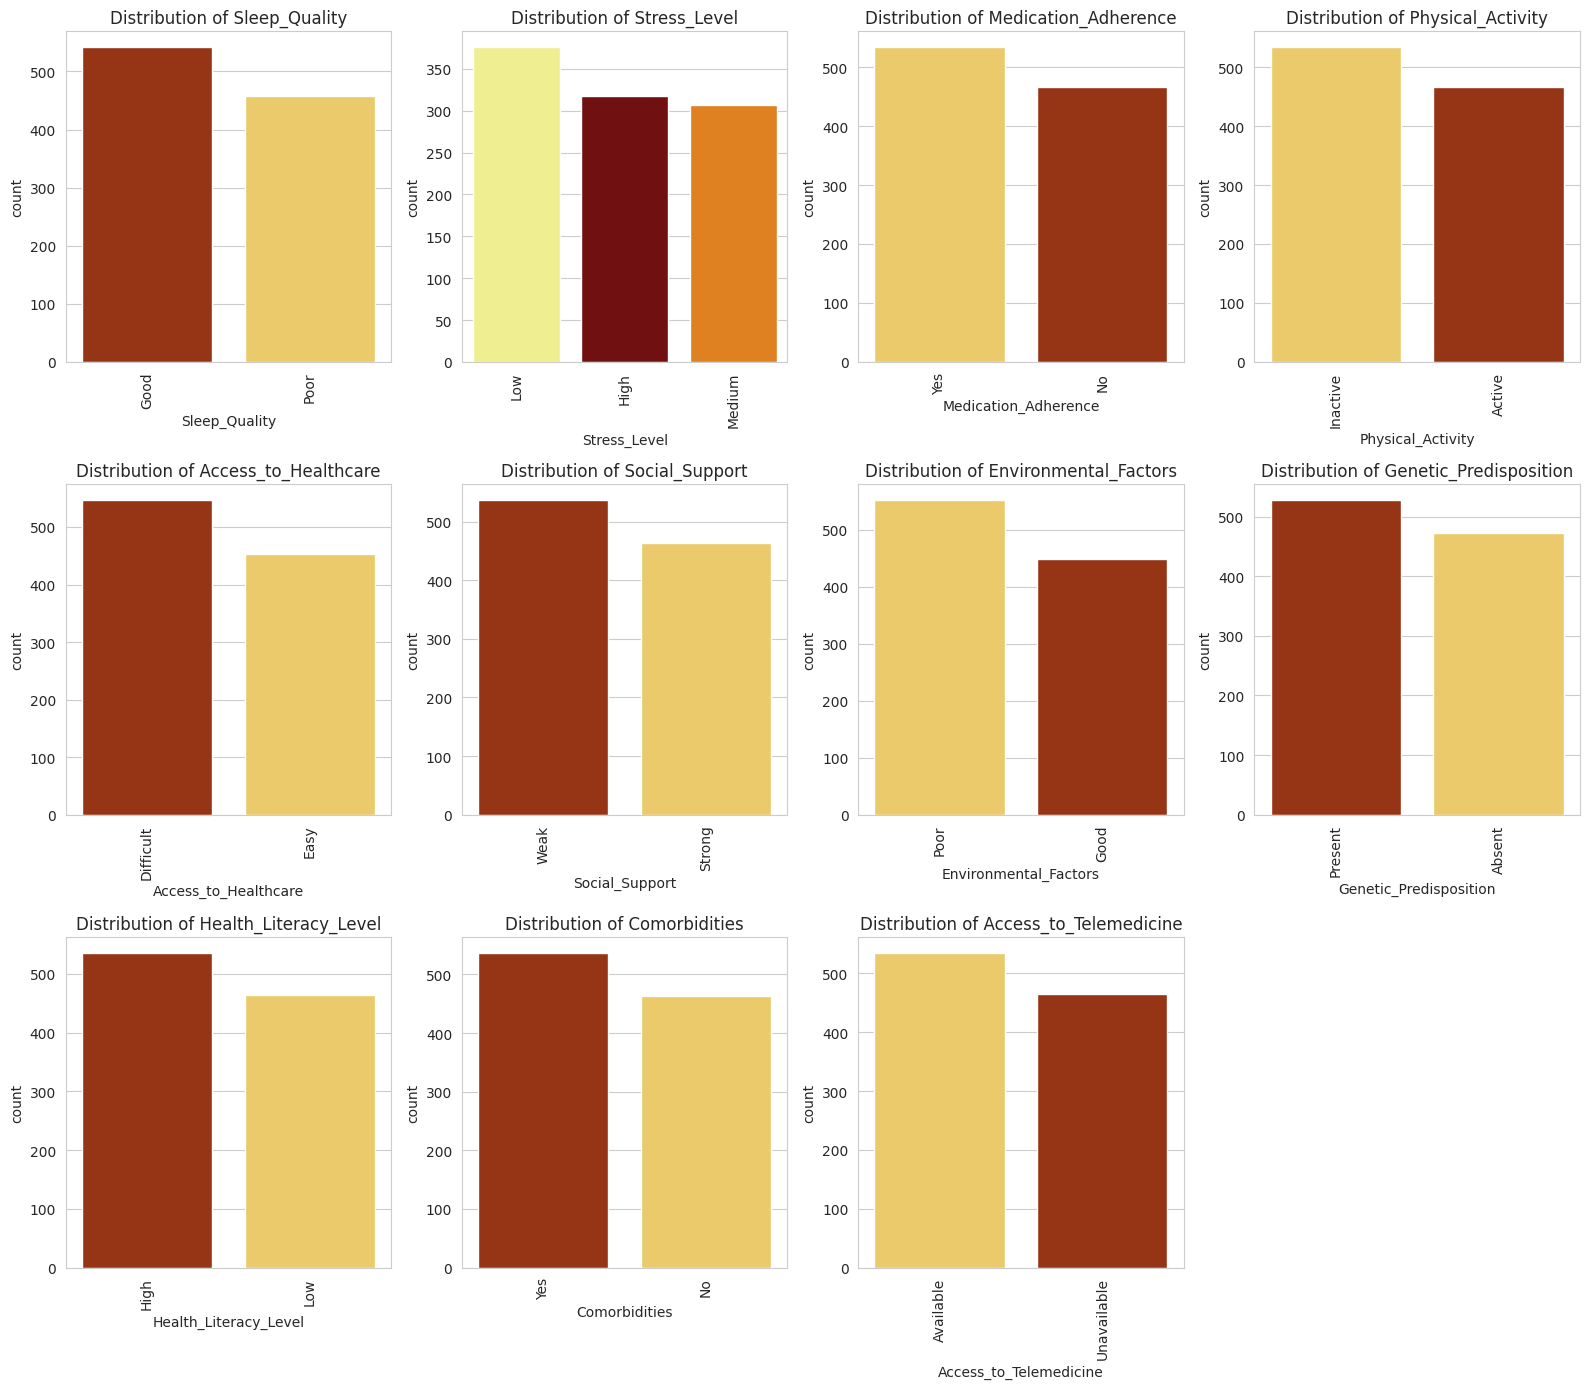

In [540]:
plt.figure(figsize = (16, 14))
columns_to_plot1 = ['Sleep_Quality', 'Stress_Level', 'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare', 'Social_Support',
                    'Environmental_Factors', 'Genetic_Predisposition', 'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine']
for index,column in enumerate(columns_to_plot1, 1):
  plt.subplot(3, 4, index)
  sns.countplot(x = df[column], order=df[column].value_counts().index, palette = 'afmhot', hue = df[column])
  plt.title(f'Distribution of {column}')
  plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

*Insights*

* Most patients reported experiencing good quality sleep.
* The majority reported low levels of stress.
* "Yes" is the predominant response in the medication adherence column.
* A significant portion of patients are inactive.
* Access to healthcare is challenging for the majority.
* Many patients lack adequate social support.  
*  The majority reported a negative impact of environmental factors on health.
* Genetic predisposition is prevalent among the majority.
*  A majority of patients reported high health literacy.
*  A significant proportion of patients have comorbidities.
*  While access to telemedicine is available for many, a notable portion reported its unavailability.  


Text(0.5, 1.0, 'Sex vs Charges')

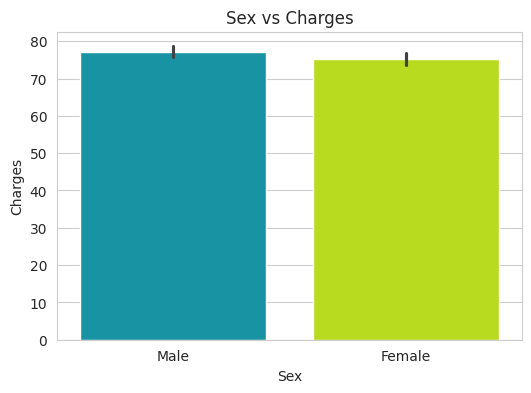

In [541]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Charges', data=df, palette='nipy_spectral', hue='Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Sex vs Charges')

*Insights*

*   The chart is a comparison of charges between two categories labeled as ‘0’(Female) and ‘1’(Male), possibly representing different sexes.  .
*   Both categories have significant charges, but category ‘1’(Male) has slightly more charges than category ‘0’(Female).
*   This suggests that there is a difference in charges between these two categories

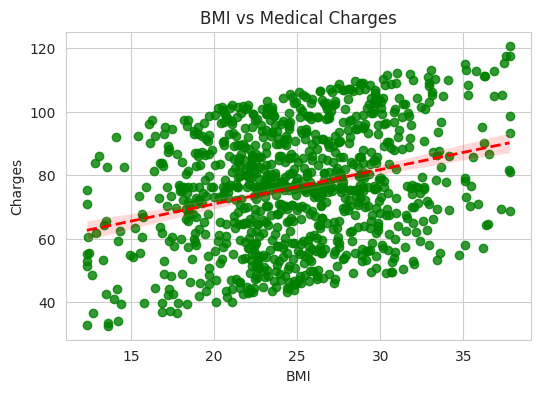

In [542]:
plt.figure(figsize=(6, 4))
sns.regplot(x='BMI', y='Charges', data=df, color='green', line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})
plt.title('BMI vs Medical Charges')
plt.show()

*Insights*

*   The graph shows a relationship between BMI (Body Mass Index) and Charges, possibly medical charges or insurance premiums.
*  The x-axis represents BMI, ranging approximately from 15 to 40, and the y-axis represents Charges, ranging approximately from 0 to 18000.
*   There seems to be a concentration of data points between BMI values of around 20 to 30 and Charges ranging from about 0 to 16000.
*   This suggests that while BMI may have some influence on charges.

Text(0.5, 1.0, 'Region vs Charges')

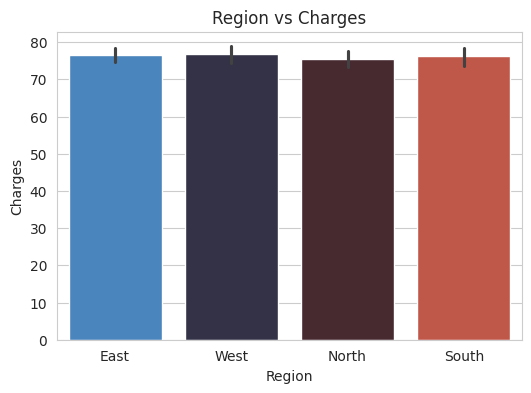

In [543]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x='Region', y='Charges', data=df, palette='icefire', hue='Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs Charges')

*Insights*

*   The graph shows a comparison of ‘Charges’ across four different ‘Regions’ labeled as 0(East), 1(North), 2(South), and 3(West). Each region is represented by a different color bar.
*   Region 0 and 3 has the highest charge distribution, as its bar reaches closest to the top of the y-axis.
*  Each bar has an error bar on top, suggesting variation in the data or confidence intervals for each region.

Text(0.5, 1.0, 'Exercise Frequency vs Charges')

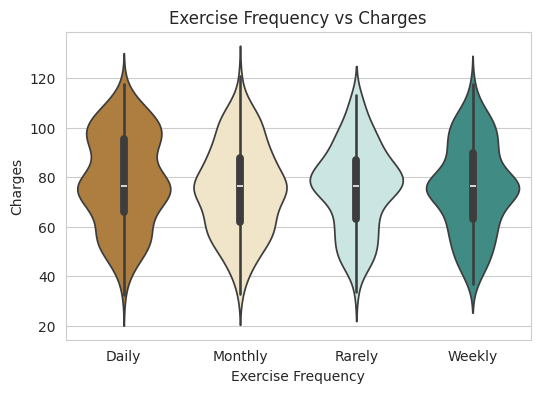

In [544]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.violinplot(x='Exercise_Frequency', y='Charges', data=df, palette='BrBG')
plt.xlabel('Exercise Frequency')
plt.ylabel('Charges')
plt.title('Exercise Frequency vs Charges')

*Insights*

*   The graph shows five different levels of exercise frequency, from 0 to 4(2 times/week,Daily,3 times/week,Once a week,Rarely).
*   Each level of exercise frequency has a different distribution of charges. The width of each violin plot indicates the density of data points at different charge levels.
* The median charge appears to increase with higher exercise frequency levels.
* The spread of charges (as indicated by the IQR) varies across different exercise frequencies.
* Exercise frequency level 1 seems to have the widest distribution of charges.   





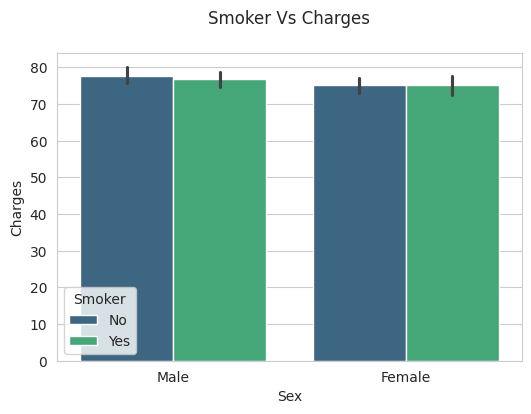

In [545]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Charges', data=df, palette='viridis', hue='Smoker')
plt.title('Smoker Vs Charges\n')
plt.show()

*Insights*

*   The chart compares charges between smokers(1) and non-smokers(0) of Male(1) and Female(0) .
*  Charges for smokers (green bars) are consistently higher than for non-smokers (blue bars) across both categories.

Text(0.5, 1.0, 'Mental Health Status VS Charges')

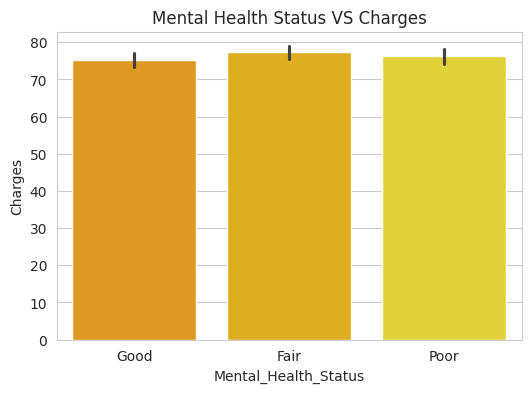

In [546]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x='Mental_Health_Status', y='Charges', data=df, palette='Wistia_r')
plt.title('Mental Health Status VS Charges')

*Insights*

*  The chart compares charges across different categories of mental health status.
*  The x-axis represents mental health status categories labeled as 0(Excellent),1(Fair),2(Poor), and 3(Good).
*  The y-axis represents charges and ranges from 0 to 10,000.  
*   Fair has the highest charge distribution.

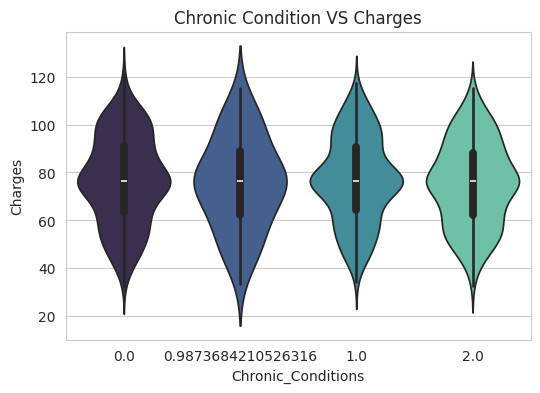

In [547]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.violinplot(x='Chronic_Conditions', y='Charges', data=df, palette='mako')
plt.title('Chronic Condition VS Charges')
plt.show()

*Insights*


*  Patients with more chronic conditions generally have higher charges.
*   0.9873684210526316 has the highest charge distribution.

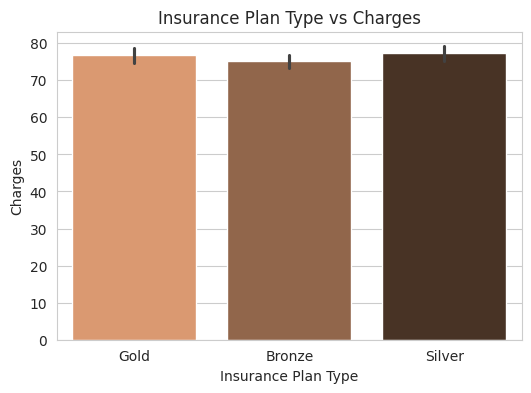

In [548]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Insurance_Plan_Type', y='Charges', palette='copper_r')
plt.xlabel('Insurance Plan Type')
plt.ylabel('Charges')
plt.title('Insurance Plan Type vs Charges')
plt.show()

*Insights*

*  The chart compares charges  across three different types of insurance plans such as 0(HDHP),1(HMO),2(PPO).
*  Type 0 and Type 1: Follows closely in terms of charges.
*  Plan Type 2: Has the highest charges.

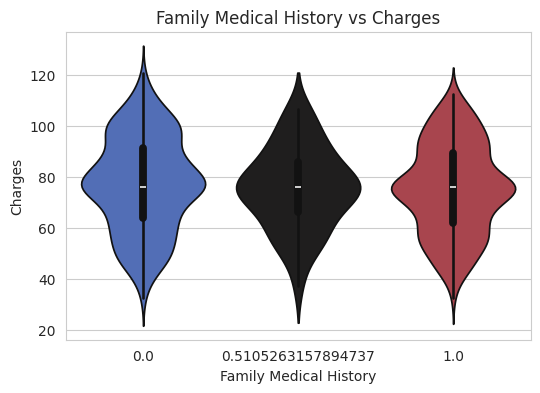

In [549]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='Family_Medical_History', y='Charges', palette='icefire')
plt.xlabel('Family Medical History')
plt.ylabel('Charges')
plt.title('Family Medical History vs Charges')
plt.show()

*Insights*

*   The x-axis represents the Family Medical History with two categories: ‘0’ and ‘1’. ‘0’ likely indicates no family history, and ‘1’ indicates a presence of family medical history.
*  The y-axis represents “Charges” and ranges from 0 to 20,000.
*  The spread of the blue plot (category ‘0’) appears wider than that of the red plot (category ‘1’).
*   This could indicate that individuals with a family medical history might have higher medical expenses.  



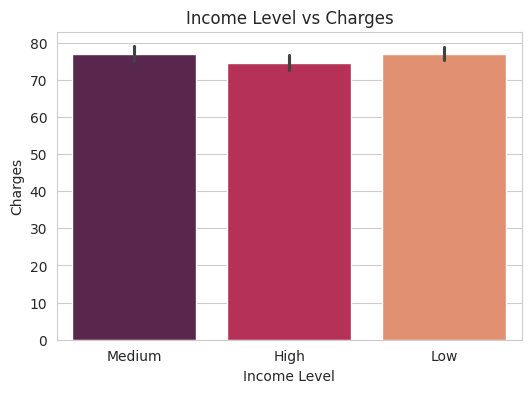

In [550]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Income_Level', y='Charges', palette='rocket')
plt.xlabel('Income Level')
plt.ylabel('Charges')
plt.title('Income Level vs Charges')
plt.show()

*Insights*

*   The graph represents three different income levels categorized as 0(High), 1(Low), and 2(Medium) on the x axis.
* The y axis represents charges with increments of 2000 up to 10000.
*  1 and 2 has the highest charge distribution.  

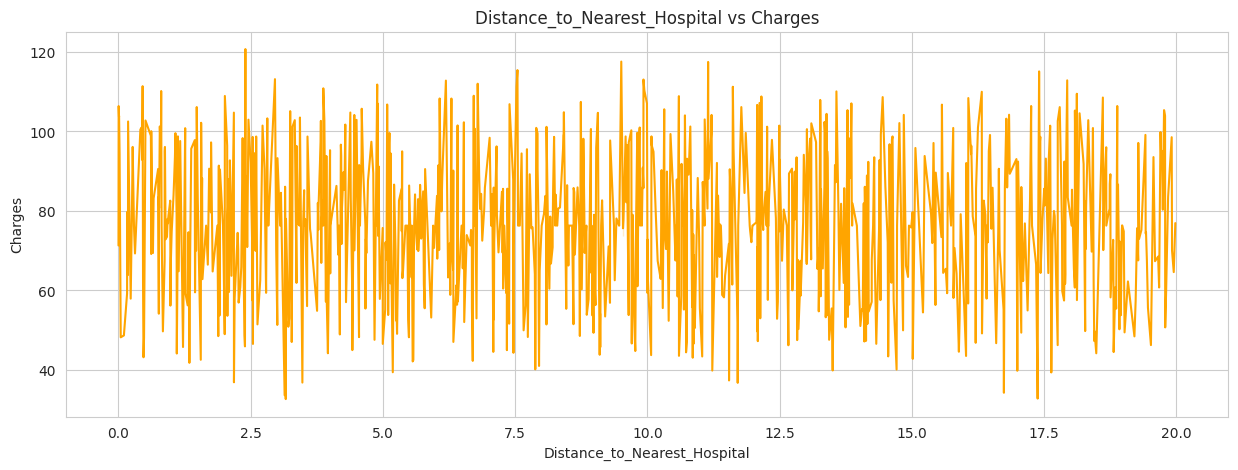

In [551]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Distance_to_Nearest_Hospital', y='Charges', color='orange')
plt.xlabel('Distance_to_Nearest_Hospital')
plt.ylabel('Charges')
plt.title('Distance_to_Nearest_Hospital vs Charges')
plt.show()

*Insights*

*    There are numerous data points plotted on the graph, each representing an individual charge amount at various distances from a hospital.
*  The data points are densely packed and show a wide distribution of charges at all distances.
*  This could suggest that the charges being compared are not significantly influenced by the distance to the nearest hospital.

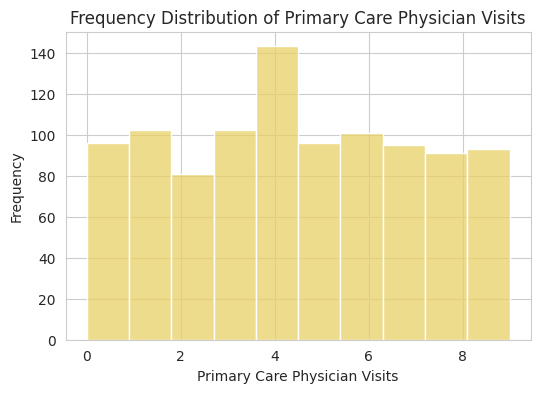

In [552]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Primary_Care_Physician_Visits', bins=10, kde=False, color='#E8D166')
plt.title('Frequency Distribution of Primary Care Physician Visits')
plt.xlabel('Primary Care Physician Visits')
plt.ylabel('Frequency')
plt.show()

*Insights*

*   The horizontal axis (x-axis) is labeled “Primary Care Physician Visits” and ranges from 1 to 9.
*  The vertical axis (y-axis) represents the frequency of visits.
*   The highest frequency appears to be around 4visits, as indicated by the tallest bar.
*  There is a gradual decline in frequency as the number of visits increases.
*   The lowest frequency seems to be for 2 visits.

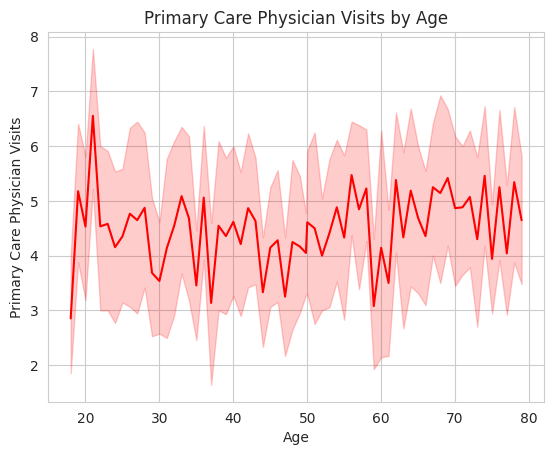

In [553]:
sns.lineplot(data=df, x='Age', y='Primary_Care_Physician_Visits',color='red')
plt.title('Primary Care Physician Visits by Age')
plt.xlabel('Age')
plt.ylabel('Primary Care Physician Visits')
plt.show()



*   There is no visible pattern.



#Step 3:- Feature Engineering

*Insights*

*   Create new features that might provide valuable information for modeling.
*   Transform existing features to make them more suitable for modeling.
*   Encode categorical variables if needed (e.g. label encoding).
*   The dataset's target and feature variables must be chosen.












##Label Encoding:-

In [554]:
encoder=LabelEncoder()
categorical = df.select_dtypes(include = "object")
for column in categorical.columns:
  df[column] = encoder.fit_transform(df[column])



*  This code snippet uses LabelEncoder from scikit-learn to encode categorical variables in the DataFrame df.
* Initializes a new LabelEncoder object which will be used to encode categorical variables.
*  **encoder.fit_transform(df[column])**: This fits the LabelEncoder to the values in the column and transforms the categories into numerical labels.
* After this code is executed, the categorical variables in the DataFrame df will be replaced with numerical labels encoded by the LabelEncoder, making the data suitable for machine learning algorithms that require numerical inputs.



In [555]:
df


,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges,...,Stress_Level,Medication_Adherence,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine
0,56.0,26.787630,0.0,2.0,12.233110,0.0,6.000000,4.0,975.538000,84.787630,...,0,0,0,0,1,0,1,0,1,1
1,69.0,22.063650,4.0,2.0,11.314950,0.0,2.000000,2.0,1047.977000,92.063650,...,2,0,1,0,1,0,0,0,1,0
2,46.0,24.036100,2.0,1.0,14.294050,1.0,9.000000,2.0,836.385400,71.036100,...,0,1,1,0,0,0,0,1,0,1
3,32.0,24.229820,2.0,2.0,18.754090,0.0,2.000000,0.0,927.065300,58.229820,...,0,1,1,0,0,0,1,1,0,0
4,60.0,31.784280,0.0,0.0,18.245090,1.0,2.000000,2.0,1260.797000,91.784280,...,2,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.0,17.794340,0.0,1.0,3.480209,0.0,2.000000,2.0,932.216700,36.794340,...,1,1,1,0,0,0,0,1,1,1
996,35.0,22.538240,1.0,1.0,15.215190,1.0,2.000000,4.0,1280.235000,58.538240,...,1,0,0,1,1,0,0,1,1,1
997,49.0,18.285480,4.0,2.0,0.316761,0.0,3.000000,1.0,1336.665000,69.285480,...,0,0,1,1,1,1,1,0,0,1
998,64.0,22.096110,2.0,0.0,11.156200,1.0,8.000000,0.0,779.283400,88.096110,...,0,1,0,0,0,0,1,0,1,1


##Finding The Correlation Between The Columns:-

In [556]:
df.corr()

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges,...,Stress_Level,Medication_Adherence,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine
Age,1.000000,0.032265,0.026279,-0.051093,-0.025700,-0.053547,0.046938,-0.020328,0.031315,0.937173,...,0.012336,0.024016,-0.027454,-0.018808,0.000202,-0.027238,-0.025694,0.020989,-0.021240,-0.036018
BMI,0.032265,1.000000,0.006642,0.043199,-0.015898,-0.019778,0.056657,0.067692,-0.021195,0.299054,...,-0.034941,-0.024541,-0.022354,-0.010435,0.029550,0.027458,-0.044784,0.012664,-0.010747,0.026852
Children,0.026279,0.006642,1.000000,-0.028874,0.006191,0.032370,-0.000875,0.049350,0.007979,0.021925,...,-0.014435,-0.022045,0.018522,0.029724,0.024510,0.016552,-0.019042,0.019221,-0.033759,-0.018397
Chronic_Conditions,-0.051093,0.043199,-0.028874,1.000000,0.011305,0.022306,-0.018683,0.009716,0.013087,-0.032226,...,-0.070871,0.008704,-0.021752,0.052159,0.051777,-0.011025,0.000961,-0.021561,0.026706,0.075254
Distance_to_Nearest_Hospital,-0.025700,-0.015898,0.006191,0.011305,1.000000,-0.021824,-0.036819,-0.013397,0.007525,-0.034345,...,-0.049203,0.047511,-0.036674,-0.010407,-0.013227,-0.017812,-0.046931,-0.008255,-0.006909,-0.030630
Family_Medical_History,-0.053547,-0.019778,0.032370,0.022306,-0.021824,1.000000,-0.027817,0.028734,0.000115,-0.052391,...,0.005470,-0.013599,-0.036358,0.028276,-0.038735,0.053545,0.050352,-0.041827,0.000412,0.011673
Primary_Care_Physician_Visits,0.046938,0.056657,-0.000875,-0.018683,-0.036819,-0.027817,1.000000,-0.006787,-0.076722,0.061899,...,0.043296,0.012643,0.001847,-0.057409,-0.035504,-0.024860,-0.055577,-0.027754,-0.019278,0.008526
Emergency_Room_Visits,-0.020328,0.067692,0.049350,0.009716,-0.013397,0.028734,-0.006787,1.000000,0.022267,-0.011663,...,-0.020547,-0.071349,-0.005002,-0.012976,-0.005124,-0.043878,0.042480,0.000075,0.050750,0.042547
Healthcare_Utilization,0.031315,-0.021195,0.007979,0.013087,0.007525,0.000115,-0.076722,0.022267,1.000000,0.034268,...,-0.012235,-0.065720,-0.038815,0.053687,0.021356,-0.003077,0.030382,0.034000,0.055174,-0.015325
Charges,0.937173,0.299054,0.021925,-0.032226,-0.034345,-0.052391,0.061899,-0.011663,0.034268,1.000000,...,0.010236,0.015296,-0.019656,-0.031828,0.002163,-0.012145,-0.039897,0.022850,-0.015895,-0.025794


##Selection of Feature And Target Variable

In [557]:
X=df.drop(columns=['Charges'])
y=df['Charges']



* **df.drop(columns=['Charges']):** This drops the 'Charges' column from the DataFrame df, creating the feature matrix X containing all other columns.
*  **df['Charges']:** This selects only the 'Charges' column from the DataFrame df, creating the target vector y.



# Step 4:- Data Splitting




*    Split the dataset into training and testing sets to evaluate model
performance with a ration of 80-20.




In [558]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

*Insights*

*    We can split the data into training and testing sets using the train_test_split function from the scikit-learn library.
*   "test_size=0.2" specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.
*   "random_state" is used to ensure reproducibility. Setting it to a fixed value (e.g., 42) ensures that the data split is the same every time you run the code.
*   X_train and y_train will contain the features and target variable for the training set.
*   X_test and y_test will contain the features and target variable for the testing set.
  







##**Scaling**


*   Data standardisation is required following data splitting.
*   StandardScaler() is used in this instance to do standardisation.



In [559]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)



*   We create a StandardScaler object.
*   We fit the scaler on the training features (X) and then transform both training and testing features using the fitted scaler.


In [560]:
X

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Sex,...,Stress_Level,Medication_Adherence,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine
0,0.350438,0.368912,-1.459108,1.282071,0.484349,-1.047810,5.436610e-01,1.419068,-0.095930,0.911867,...,-1.253365,-1.070478,-1.070478,-0.910029,0.928546,-1.110019,0.945484,-0.930415,0.928546,1.072631
1,1.088109,-0.580369,1.427240,1.282071,0.318703,-1.047810,-8.890101e-01,-0.059873,0.293850,0.911867,...,1.278686,-1.070478,0.934162,-0.910029,0.928546,-1.110019,-1.057660,-0.930415,0.928546,-0.932287
2,-0.217001,-0.184006,-0.015934,0.015993,0.856164,1.004601,1.618164e+00,-0.059873,-0.844682,-1.096651,...,-1.253365,0.934162,0.934162,-0.910029,-1.076953,-1.110019,-1.057660,1.074789,-1.076953,1.072631
3,-1.011415,-0.145078,-0.015934,1.282071,1.660801,-1.047810,-8.890101e-01,-1.538814,-0.356751,0.911867,...,-1.253365,0.934162,0.934162,-0.910029,-1.076953,-1.110019,0.945484,1.074789,-1.076953,-0.932287
4,0.577414,1.372986,-1.459108,-1.250085,1.568972,1.004601,-8.890101e-01,-0.059873,1.438991,0.911867,...,1.278686,0.934162,0.934162,1.098866,0.928546,0.900885,0.945484,1.074789,0.928546,-0.932287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.805829,-1.438284,-1.459108,0.015993,-1.094765,-1.047810,-8.890101e-01,-0.059873,-0.329033,0.911867,...,0.012660,0.934162,0.934162,-0.910029,-1.076953,-1.110019,-1.057660,1.074789,0.928546,1.072631
996,-0.841183,-0.485000,-0.737521,0.015993,1.022347,1.004601,-8.890101e-01,1.419068,1.543583,-1.096651,...,0.012660,-1.070478,-1.070478,1.098866,0.928546,-1.110019,-1.057660,1.074789,0.928546,1.072631
997,-0.046769,-1.339590,1.427240,1.282071,-1.665483,-1.047810,-5.308423e-01,-0.799344,1.847222,0.911867,...,-1.253365,-1.070478,0.934162,1.098866,0.928546,0.900885,0.945484,-0.930415,-1.076953,1.072631
998,0.804389,-0.573846,-0.015934,-1.250085,0.290063,1.004601,1.259996e+00,-1.538814,-1.151936,0.911867,...,-1.253365,0.934162,-1.070478,-0.910029,-1.076953,-1.110019,0.945484,-0.930415,0.928546,1.072631


In [561]:
y

0      84.787630
1      92.063650
2      71.036100
3      58.229820
4      91.784280
         ...    
995    36.794340
996    58.538240
997    69.285480
998    88.096110
999    76.292654
Name: Charges, Length: 1000, dtype: float64

In [562]:
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance Ranking:")
print(feature_importance_df)

Feature Importance Ranking:
                          Feature  Importance
0                             Age    0.883777
1                             BMI    0.107594
8          Healthcare_Utilization    0.001130
4    Distance_to_Nearest_Hospital    0.001034
6   Primary_Care_Physician_Visits    0.000557
7           Emergency_Room_Visits    0.000536
2                        Children    0.000504
19              Employment_Status    0.000335
3              Chronic_Conditions    0.000291
12                     Occupation    0.000288
11                         Region    0.000286
14            Insurance_Plan_Type    0.000252
20                Education_Level    0.000235
24                   Stress_Level    0.000234
17           Mental_Health_Status    0.000209
15                 Marital_Status    0.000208
13             Exercise_Frequency    0.000203
5          Family_Medical_History    0.000194
9                             Sex    0.000171
10                         Smoker    0.000170
16    


*   This code snippet utilizes a RandomForestRegressor model to determine feature importances and ranks them accordingly. It then prints out the feature importance ranking.



In [563]:
features = X.columns[feature_importances.argsort()[-9:][::-1]]
features

Index(['Age', 'BMI', 'Healthcare_Utilization', 'Distance_to_Nearest_Hospital',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits', 'Children',
       'Employment_Status', 'Chronic_Conditions'],
      dtype='object')


*  This code selects the top 9 features with the highest importances from the RandomForestRegressor model.
*  **feature_importances.argsort()**: This returns the indices that would sort the array of feature importances in ascending order.


In [564]:
X = df[features]
y = df['Charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


*  This code splits the dataset into training and testing sets for both the features (X) and the target variable (y) using the train_test_split function from scikit-learn.



In [565]:
X.isnull().sum()

Age                              0
BMI                              0
Healthcare_Utilization           0
Distance_to_Nearest_Hospital     0
Primary_Care_Physician_Visits    0
Emergency_Room_Visits            0
Children                         0
Employment_Status                0
Chronic_Conditions               0
dtype: int64

In [566]:
X.skew()

Age                             -0.067493
BMI                              0.022404
Healthcare_Utilization          -0.052513
Distance_to_Nearest_Hospital     0.100283
Primary_Care_Physician_Visits   -0.005097
Emergency_Room_Visits           -0.056580
Children                        -0.030945
Employment_Status                0.120962
Chronic_Conditions               0.023664
dtype: float64

In [567]:
X_test.shape

(200, 9)

In [568]:
y_train.shape

(800,)

#Step 5:- Model Selection

## Machine Learning


*   Machine learning is a subset of AI, which uses algorithms that learn from data to make predictions.
*   These predictions can be generated through supervised learning, where algorithms learn patterns from existing data, or unsupervised learning, where they discover general patterns in data.
*   From the problem statement we got that we have to predict the medical insurance cost for patients.
*   In machine learning, regression is used for predictions.
*   The regression models used:
>
              - Linear Regression
              - Decision Tree
              - Random Forest
              - Support Vector Machine(SVM)
              - Gradient Boosting
              - XGBoost


#Step 6:- Model Training

##1. Linear regression


*  Linear regression is a fundamental supervised machine learning algorithm used for predicting numerical values based on input features.  
* It assumes a linear relationship between the features and the target variable.
* The model learns the coefficients that best fit the data and can make predictions for new inputs.

Mean Absolute Error: 1.4535002251499218
Mean Squared Error: 7.256977043290083
R-squared Score: 0.977607115565157


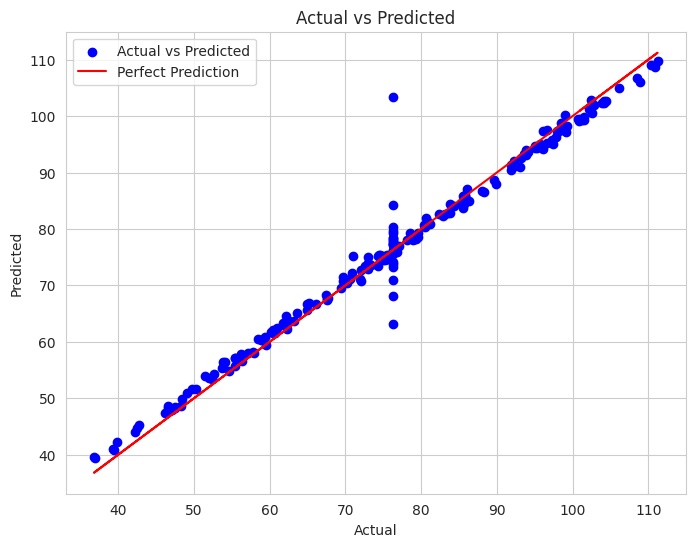

In [569]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
ma = mean_absolute_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
print("Mean Absolute Error:",ma)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2score)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



* We instantiate a LinearRegression model.  
* We fit the model on the training data (X_train and y_train).  
* We predict on the  testing data (X_test).  
* We compute the evaluation metrics: MSE, MAE, RMSE, and R-squared score.   
* Finally, we create a scatter plot comparing the actual vs predicted values.
* The red line represents a perfect prediction.  

##2. Decision Tree


*  Decision trees are a popular  supervised machine learning algorithm that can be used for both regression and classification tasks.
*  In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node.
*  The decisions or the test are performed on the basis of features of the given dataset.

Mean Absolute Error: 1.3764100080931256
Mean Squared Error: 3.563203335534872
R-squared Score: 0.9890050085545944


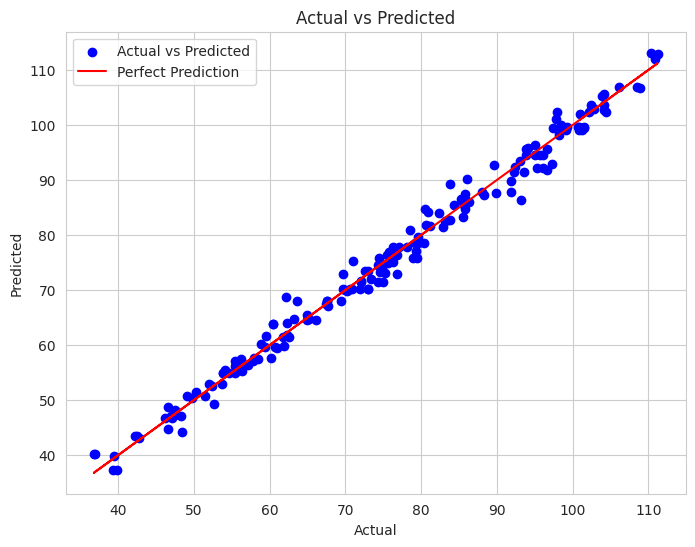

In [570]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_tree = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_tree)
mae = mean_absolute_error(y_test, y_pred_tree)
r2score = r2_score(y_test, y_pred_tree)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2score)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()




*   We instantiate a DecisionTreeRegressor.
*   We fit the model on the training data (X_train and y_train).
*  We predict on the testing data (X_test).
*   We compute the evaluation metrics: MSE, MAE, RMSE, and R-squared score for the Decision Tree model.
*   Finally, we create a scatter plot comparing the actual vs predicted values for the Decision Tree model.


##3. Random Forest


*   Random forest regression is a supervised learning algorithm and bagging technique that uses an ensemble learning method for regression in machine learning.
*  The trees in random forests run in parallel, meaning there is no interaction between these trees while building the trees.

Mean Absolute Error: 1.050755599590911
Mean Squared Error: 3.1494630301162916
R-squared Score: 0.9902816887466368


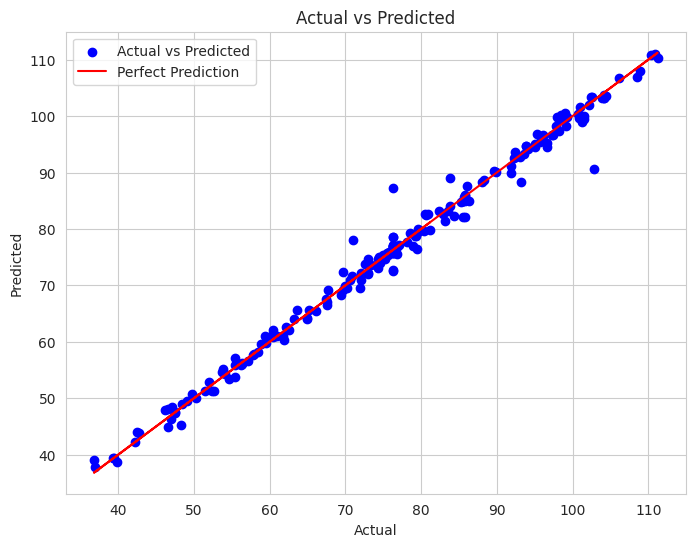

In [571]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2score = r2_score(y_test, y_pred_rf)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2score)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



*  We instantiate a RandomForestRegressor.
*  We fit the model on the training data (X_train and y_train).
*  We predict on the testing data (X_test).
*  We compute the evaluation metrics: MSE, MAE, RMSE, and R-squared score for the Random Forest model.
* Finally, we create a scatter plot comparing the actual vs predicted values for the Random Forest model.

##4. Support Vector Machine(SVM)


*  Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.
*   SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes
*  SVM chooses the extreme points/vectors that help in creating the hyperplane.

Mean Absolute Error: 14.135144814208276
Mean Squared Error: 311.35682462914866
R-squared Score: 0.03924494313141136


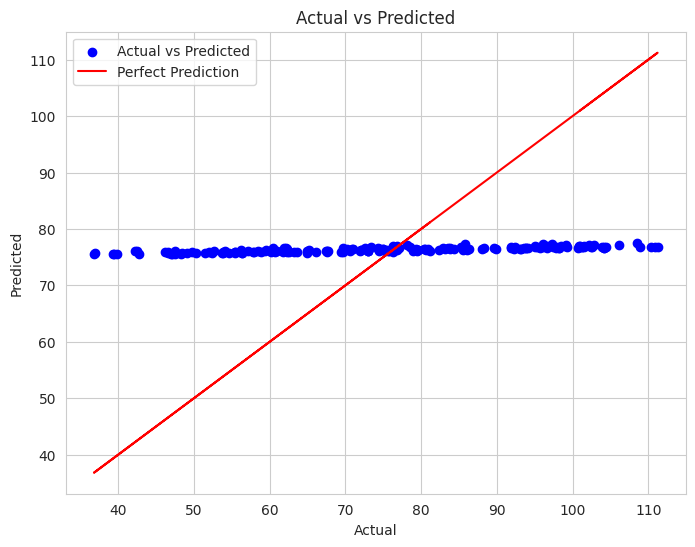

In [572]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_svm)
mae = mean_absolute_error(y_test, y_pred_svm)
r2score = r2_score(y_test, y_pred_svm)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2score)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



*   We instantiate an SVM regressor (SVR).
*   We fit the model on the training data (X_train and y_train).
*   We predict on the testing data (X_test).
*   We compute the evaluation metrics: MSE, MAE, RMSE, and R-squared score for the SVM model.
*   Finally, we create a scatter plot comparing the actual vs predicted values for the SVM model.

##5. Gradient Boosting


*   Gradient Boosting Machine (GBM) is considered one of the most powerful boosting algorithms.
*   Boosting is one of the popular learning ensemble modeling techniques used to build strong classifiers from various weak classifiers.
*  It builds a better model by merging earlier models until the best model reduces the total prediction error.

Mean Absolute Error: 1.3823677062125383
Mean Squared Error: 4.0834287987901545
R-squared Score: 0.9873997466653468


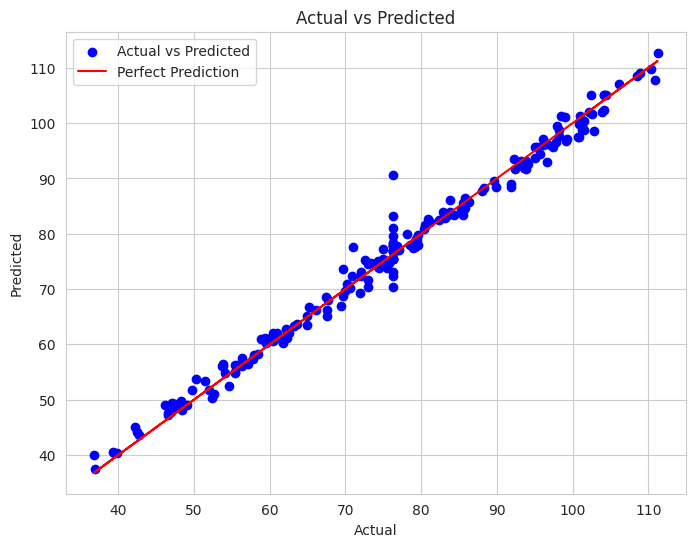

In [573]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_gb = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)
r2score = r2_score(y_test, y_pred_gb)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2score)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



*  We instantiate a Gradient Boosting Regressor (GradientBoostingRegressor).
*  We fit the model on the training data (X_train and y_train).
*  We predict on the testing data (X_test).
*  We compute the evaluation metrics: MSE, MAE, RMSE, and R-squared score for the Gradient Boosting model.
*  Finally, we create a scatter plot comparing the actual vs predicted values for the Gradient Boosting model.



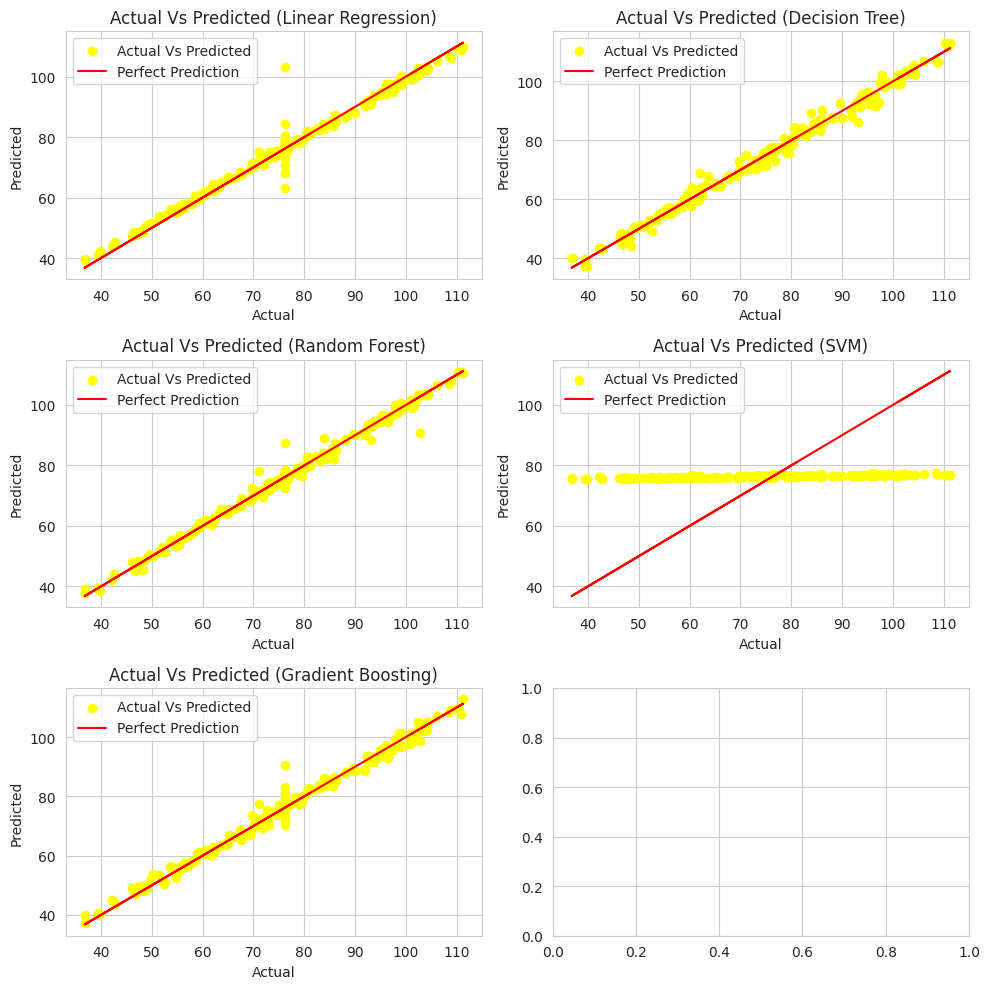

In [574]:
models=[
    ('Linear Regression',y_pred),
    ('Decision Tree',y_pred_tree),
    ('Random Forest',y_pred_rf),
    ('SVM',y_pred_svm),
    ('Gradient Boosting',y_pred_gb)
]
fig,axes=plt.subplots(3,2,figsize=(10,10))
axes=axes.flatten()
for i,(model_name,y_pred_model) in enumerate(models):
  ax=axes[i]
  ax.scatter(y_test,y_pred_model,color='yellow',label='Actual Vs Predicted')
  ax.plot(y_test,y_test,color='red',label='Perfect Prediction')
  ax.set_title(f'Actual Vs Predicted ({model_name})')
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  ax.legend()
plt.tight_layout()
plt.show()



*  Each model (e.g., Linear Regression, Decision Tree, etc.) has been trained and used to predict target values **(y_pred, y_pred_tree, etc.)**.
* It creates a subplot grid of 3 rows and 2 columns **(plt.subplots(3,2,figsize=(10,10)))**, which means there will be 6 plots arranged in this grid.
* It iterates over each model and its corresponding predicted values using a for loop.  
*  Inside the loop, it plots the actual versus predicted values on one of the subplots.  
*  For each model, it creates a scatter plot where the x-axis represents the actual values **(y_test)** and the y-axis represents the predicted values **(y_pred_model)**.
*  It adds a red line on each plot, indicating perfect predictions where the actual values equal the predicted values.   



#Step 7:- Model Evaluation

In [575]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Support Vector Machine', SVR(kernel='linear')),
    ('Gradient Boosting', GradientBoostingRegressor())
]
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse,r2])
r = pd.DataFrame(results, columns=['Model', 'MSE', 'R-squared'])
print("Model Comparison:")
r

Model Comparison:


,Model,MSE,R-squared
0,Linear Regression,7.256977,0.977607
1,Decision Tree,4.098087,0.987355
2,Random Forest,2.898366,0.991057
3,Support Vector Machine,6.507266,0.979921
4,Gradient Boosting,4.075587,0.987424




*  A list named models is created, containing the name of the regression model, and instance of regression model itself.
*  A loop iterates over each tuple in the models list.
*   The results are stored in a DataFrame named r with columns 'Model', 'MSE', and 'R-squared'.
* The DataFrame is printed to display a comparison of the performance of different regression models in terms of their MSE and R-squared score.  
*   The comparison allows us to understand which regression model performs better on the given dataset in terms of predicting the target variable.
  

## Choosing Best model

In [576]:
best_mse = r['MSE'].idxmin()
best_r2 = r['R-squared'].idxmax()
best_model = r.loc[[best_mse, best_r2]].iloc[0]
print("\nBest performing models based on Model Evaluation:")
best_model


Best performing models based on Model Evaluation:


Model        Random Forest
MSE               2.898366
R-squared         0.991057
Name: 2, dtype: object



*  The code finds the index of the row with the minimum MSE (best_mse) and the index of the row with the maximum R-squared (best_r2) from the DataFrame r.
*  Using the indices found in the previous step, the code retrieves the information of the best-performing model from the DataFrame r and stores it in best_model.
*  The iloc function is used to locate the row with the specified indices.
*  Finally, the code prints the information of the best-performing model based on both MSE and R-squared score.

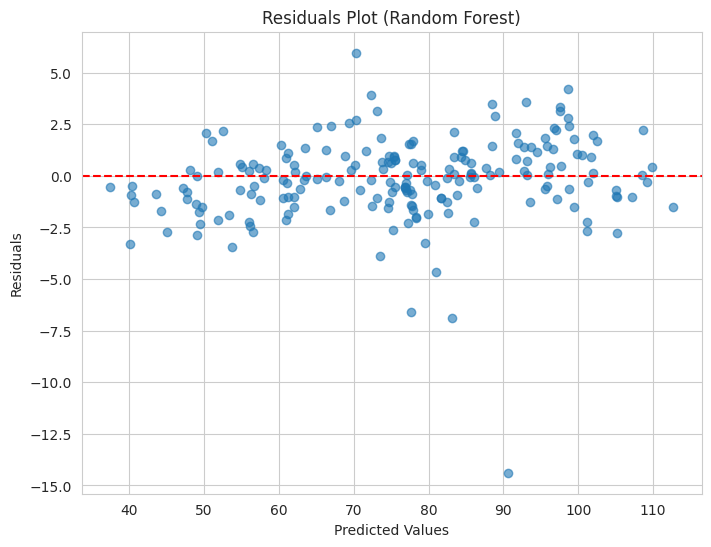

In [577]:
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0 for reference
plt.title('Residuals Plot (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



*   This residuals plot helps in assessing the model's performance by visualizing the distribution of errors (residuals) around the predicted values.
*  Ideally, the residuals should be randomly scattered around the horizontal line at y=0, indicating that the model's predictions are unbiased and consistent across the range of predicted values.



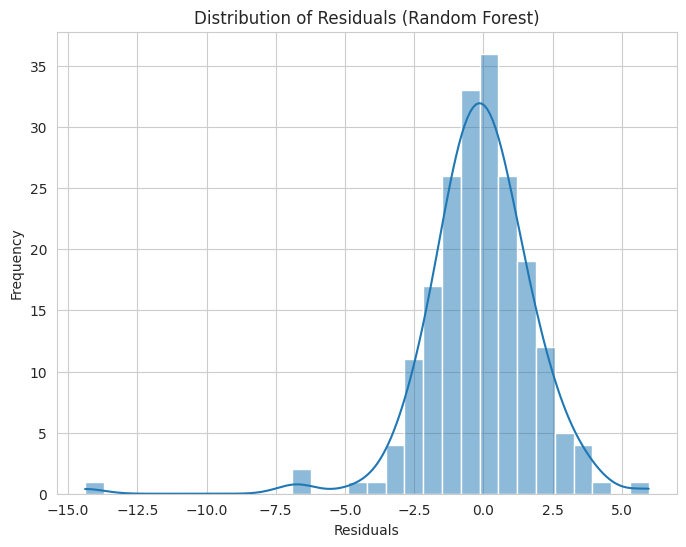

In [578]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



*   This histogram plot provides insights into the distribution of errors (residuals) from the Random Forest regression model.
*  It helps in understanding the central tendency and spread of the residuals, as well as identifying any potential patterns or deviations from normality.



#Step 8:- Model Deployment

##Model Re-training:-

In [579]:
from sklearn.ensemble import RandomForestRegressor

X_combined = np.concatenate((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_combined, y_combined)

RandomForestRegressor(random_state=42)


*   The code essentially prepares data by combining training and testing sets.  
*   Then constructs and trains a Random Forest regression model on the combined data.
*   This allows the model to learn patterns from the entire dataset, and potentially improve its predictive performance.  

##Save the trained Model:-

In [580]:
import joblib
model = 'random_forest_model.pkl'
joblib.dump(random_forest_model, model)
print("Random Forest model saved successfully to:", model)

Random Forest model saved successfully to: random_forest_model.pkl



*   This code ensures that the trained Random Forest regression model is saved to a file for later use or deployment.

##Predict charges for new customer:-

In [581]:
data={'Age':38,
      'BMI':38.21,
      'Children':3,
      'Region':2,
      'Chronic_Conditions':2,
      'Distance_to_Nearest_Hospital':13.25,
      'Primary_Care_Physician_Visits':6,
      'Emergency_Room_Visits':3,
      'Healthcare_Utilization':756.8311}
dfs=pd.DataFrame(data,index=[0])
dfs

,Age,BMI,Children,Region,Chronic_Conditions,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization
0,38,38.21,3,2,2,13.25,6,3,756.8311




*  Here we create a sample customre data and convert it into dataframe.

In [582]:
model=joblib.load('random_forest_model.pkl')
model.predict(dfs)

array([72.81018254])



*   The newly created sample data is loaded into the trained model 'random_forest_model.pkl'.
*   After that the model will predict the insurace charge based on given details.

#Step 9:- Conclusion



**1. Enhance Healthcare Access:**
Make it easier for everyone to get medical help by offering more telemedicine services and addressing issues like transportation and costs. Improve telemedicine services by offering more options and explaining patients how to use them.

**2. Promote Healthy Eating:**
Encourage people to eat healthier foods by sharing information and providing resources about good nutrition.

**3. Raise Awareness for Healthy Living:**
Spread the word about healthy lifestyle choices through campaigns. This includes quitting smoking, learning about nutrition, and managing stress.

**4. Provide Social Support:**
Offer help and companionship to those who need it, so they don't feel alone or isolated.

**5. Improve the Environment:**
Make changes to the environment, like improving air quality and adding green spaces, to make people healthier.

**6. Offer Genetic Advice:**
Provide counseling and screening for people with a family history of certain diseases to help them manage their health better.

**7. Educate People About Health:**
Teach people how to understand health information and make good decisions about their health.

**8.Manage Multiple Health Problems:**
Create plans to help people with more than one health problem get the care they need and avoid getting sicker.

**9. Preventive Care:**
Encourage regular check-ups and vaccinations to stop people from getting sick in the first place.

**10. Financial Help:**
Find ways to help people pay for medical bills if they don't have much money. Help people understand their insurance options and get the right coverage for their medical needs.

**11. Use Data to Decide:**
Look at information about patients to figure out who needs help the most and where to spend money to help them.
